In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
df_kaluz = pd.read_csv('final_data_files/kaluzny_2004_rrl_reformat',delim_whitespace=True,index_col='id')

In [3]:
df_orig = pd.read_csv('final_data_files/uncrowded_everything_all_clipped.csv',index_col='id')
#df_orig.update(df_kaluz[['per','type']])
#df_orig.to_csv('final_data_files/uncrowded_everything_all_clipped.csv')
df_orig['mag_avg_3p6'] = np.nan
df_orig['merr_avg_3p6'] = np.nan
df_orig['mag_avg_4p5'] = np.nan
df_orig['merr_avg_4p5'] = np.nan

In [4]:
pd.set_option('display.max_columns', 500)
cal_dir = '../calibrated_files/'

colnames = [['als_id'],['x'],['y']]
colnames += [['mag_{}'.format(i), 'merr_{}'.format(i)] for i in range(1,15)]
colnames = sum(colnames, [])

for filt in ['3p6','4p5']:
    cal_files = glob.glob(cal_dir + '*{}um_rrl_matched_to_kaluzny.cut'.format(filt))
    for f in cal_files:
        mag = 'mag_avg_{}'.format(filt)
        merr = 'merr_avg_{}'.format(filt)
        df = pd.read_csv(f,index_col='ID')
        #print df.als_id
        df.Type = df.Type.str.split('RR').str.get(-1).astype(int)
        df.index = df.index.str.split('V').str.get(-1).astype(int)
        df[mag] = df.Gloess_mag
        df[merr] = df.Gloess_err
        df_orig.update(df[[mag,merr]])

In [5]:
print len(df_orig.mag_3[np.isfinite(df_orig.mag_3)]), len(df_orig.mag_avg_3p6[np.isfinite(df_orig.mag_avg_3p6)])
print len(df_orig.mag_4[np.isfinite(df_orig.mag_4)]), len(df_orig.mag_avg_4p5[np.isfinite(df_orig.mag_avg_4p5)])

36 64
42 46


(12.4, 14)

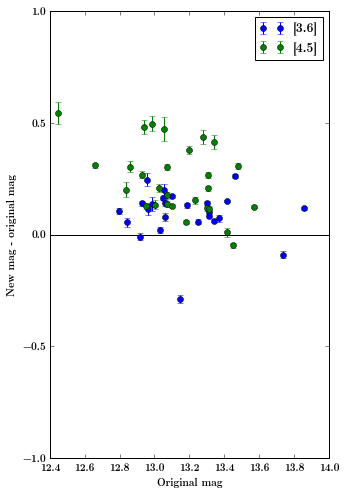

In [6]:
plt.subplots(1,1,figsize=(5,8))
plt.errorbar(df_orig.mag_3,df_orig.mag_avg_3p6 - df_orig.mag_3, df_orig.merr_avg_3p6.values, fmt='o', label='[3.6]')
plt.errorbar(df_orig.mag_4,df_orig.mag_avg_4p5 - df_orig.mag_4, df_orig.merr_avg_4p5.values, fmt='o', label='[4.5]')
plt.xlabel('Original mag')
plt.ylabel('New mag - original mag')
plt.hlines(0,12.4,14,linestyle='-')
plt.hlines(1,12.4,14,linestyle='--')
plt.hlines(-1,12.4,14,linestyle='--')
plt.legend()
plt.xlim(12.4,14)

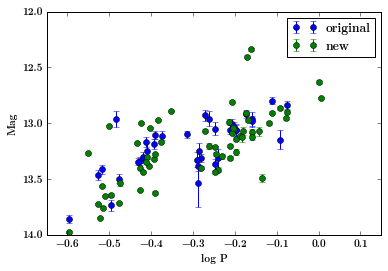

In [7]:
plt.subplots(1,1)
plt.errorbar(np.log10(df_orig.per.values), df_orig.mag_3.values,
             df_orig.merr_3.values, fmt='o', label='original')
plt.errorbar(np.log10(df_orig.per.values), df_orig.mag_avg_3p6.values,
             df_orig.merr_avg_3p6.values, fmt='o', label='new')
plt.ylim(14,12)
plt.xlim(-0.65,0.15)
plt.legend(loc=0)
plt.xlabel('log P')
plt.ylabel('Mag')

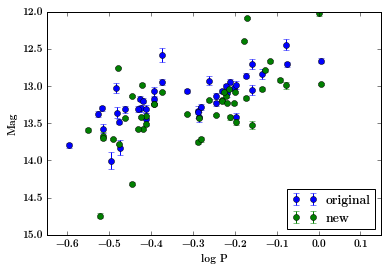

In [8]:
plt.subplots(1,1)
plt.errorbar(np.log10(df_orig.per.values), df_orig.mag_4.values,
             df_orig.merr_4.values, fmt='o', label='original')
plt.errorbar(np.log10(df_orig.per.values), df_orig.mag_avg_4p5.values,
             df_orig.merr_avg_4p5.values, fmt='o', label='new')
plt.ylim(15,12)
plt.xlim(-0.65,0.15)
plt.legend(loc=0)
plt.xlabel('log P')
plt.ylabel('Mag')

In [9]:
df_orig.to_csv('final_data_files/everything_new_photometry.csv')

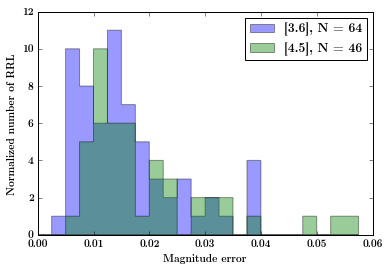

In [11]:
bins=np.arange(0,0.06,0.0025)
three = df_orig.merr_avg_3p6[np.isfinite(df_orig.merr_avg_3p6)]
four = df_orig.merr_avg_4p5[np.isfinite(df_orig.merr_avg_4p5)]
plt.hist(three,bins=bins,
     histtype='stepfilled',alpha=0.4,label='[3.6], N = {}'.format(len(three)))
plt.hist(four,bins=bins,
     histtype='stepfilled',alpha=0.4,label='[4.5], N = {}'.format(len(four)))
plt.xlabel('Magnitude error')
plt.ylabel('Normalized number of RRL')
plt.legend()
plt.savefig('mag_error_comparison_RRL.pdf')

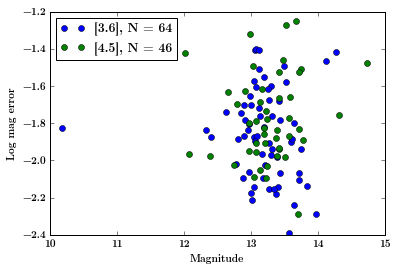

In [14]:
#bins=np.arange(0,0.06,0.0025)
three = df_orig.merr_avg_3p6[np.isfinite(df_orig.merr_avg_3p6)]
four = df_orig.merr_avg_4p5[np.isfinite(df_orig.merr_avg_4p5)]
plt.plot(df_orig.mag_avg_3p6[np.isfinite(df_orig.merr_avg_3p6)],np.log10(three),'o',
         label='[3.6], N = {}'.format(len(three)))
plt.plot(df_orig.mag_avg_4p5[np.isfinite(df_orig.mag_avg_4p5)],np.log10(four),'o',
         label='[4.5], N = {}'.format(len(four)))
plt.xlabel('Magnitude')
plt.ylabel('Log mag error')
plt.legend(loc=0)
#plt.savefig('mag_error_comparison_RRL.pdf')